In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### CV Summary

In [28]:
dbscan_tl_summary = pd.read_csv("dbscan/tl_cv_node2vec_dbscan_ms5_p85_eps_0.168134_norm_summary.csv")
dbscan_tx_summary = pd.read_csv("dbscan/tx_cv_node2vec_dbscan_ms10_p90_eps_0.098640_norm_summary.csv")

kmeans_tl_summary = pd.read_csv("k-means/tl_cv_node2vec_kmeans10_norm_summary.csv")
kmeans_tx_summary = pd.read_csv("k-means/tx_cv_node2vec_kmeans10_norm_summary.csv")


### CV Per fold

In [29]:
dbscan_tl_folds = pd.read_csv("dbscan/tl_cv_node2vec_dbscan_ms5_p85_eps_0.168134_norm_per_fold.csv")
dbscan_tx_folds = pd.read_csv("dbscan/tx_cv_node2vec_dbscan_ms10_p90_eps_0.098640_norm_per_fold.csv")


kmeans_tl_folds = pd.read_csv("k-means/tl_cv_node2vec_kmeans10_norm_per_fold.csv")
kmeans_tx_folds = pd.read_csv("k-means/tx_cv_node2vec_kmeans10_norm_per_fold.csv")


In [30]:
def get_metrics(summary_df, folds_df):
    return {
        'NMI_mean': summary_df['Avg_NMI_test'].values[0],
        'NMI_std': folds_df['NMI_test'].std(),
        'ARI_mean': summary_df['Avg_ARI_test'].values[0],
        'ARI_std': folds_df['ARI_test'].std(),
        'Purity_mean': summary_df['Avg_Purity_test'].values[0],
        'Purity_std': folds_df['Purity_test'].std()
    }

kmeans_tx = get_metrics(kmeans_tx_summary, kmeans_tx_folds)
kmeans_tl = get_metrics(kmeans_tl_summary, kmeans_tl_folds)
dbscan_tx = get_metrics(dbscan_tx_summary, dbscan_tx_folds)
dbscan_tl = get_metrics(dbscan_tl_summary, dbscan_tl_folds)

In [31]:
METHOD_ORDER = ["K-Means", "DBSCAN"]
NETWORK_ORDER = ["TX", "TL"]
METRICS = [
    ("NMI", "NMI"),
    ("ARI", "ARI"),
    ("Purity", "Purity"),
]
COLORS = {"TX": "#1f77b4", "TL": "#ff7f0e"}
ROUND_TO = 3

plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 9,
})


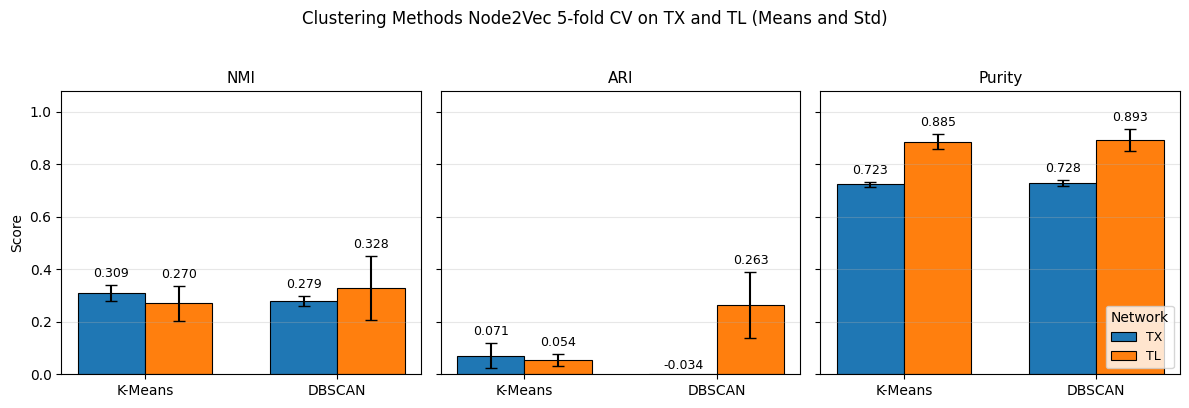

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4.2), sharey=True)

bar_width = 0.35
x = np.arange(len(METHOD_ORDER))

data = {
    'TX': {
        'K-Means': kmeans_tx,
        'DBSCAN': dbscan_tx
    },
    'TL': {
        'K-Means': kmeans_tl,
        'DBSCAN': dbscan_tl
    }
}

for i, (metric_key, label) in enumerate(METRICS):
    ax = axes[i]
    
    for j, net in enumerate(NETWORK_ORDER):
        means = [data[net][method][f'{metric_key}_mean'] for method in METHOD_ORDER]
        stds = [data[net][method][f'{metric_key}_std'] for method in METHOD_ORDER]
        
        bars = ax.bar(
            x + j * bar_width,
            means,
            yerr=stds,
            width=bar_width,
            label=net if i == 2 else None,
            color=COLORS[net],
            edgecolor="black",
            linewidth=0.8,
            capsize=4,
        )
        
        for bar, val, sd in zip(bars, means, stds):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + sd + 0.02,
                f"{val:.{ROUND_TO}f}",
                ha="center",
                va="bottom",
                fontsize=9,
            )
    
    ax.set_title(label)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(METHOD_ORDER)
    ax.set_ylim(0, 1.08)
    ax.grid(alpha=0.3, axis="y")
    
    if i == 0:
        ax.set_ylabel("Score")
    
    if i == 2:
        leg = ax.legend(
            title="Network",
            loc="lower right",
            frameon=True,
            edgecolor="0.8",
        )
        leg._legend_box.align = "left"

fig.suptitle(
    "Clustering Methods Node2Vec 5-fold CV on TX and TL (Means and Std)",
    y=0.98,
    fontsize=12,
)

fig.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.savefig('clustering_cv_comparison.png', dpi=300, bbox_inches='tight')
plt.show()